#  Data Collection and Handling

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Step1: Loading the dataset </h3>

In [3]:
# We have used pandas library to read this csv file.
df = pd.read_csv('WHO-COVID-19-global-data.csv')
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
65035,2025-02-09,ZW,Zimbabwe,AFRO,2.0,266410,NaN,5740
65036,2025-02-16,ZW,Zimbabwe,AFRO,NaN,266410,NaN,5740
65037,2025-02-23,ZW,Zimbabwe,AFRO,0.0,266410,NaN,5740
65038,2025-03-02,ZW,Zimbabwe,AFRO,0.0,266410,NaN,5740


In [4]:
# It will give the number of rows and columns
df.shape

(65040, 8)

In [5]:
# It will print first few samples from the dataset
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


<h3>Step 2: We will generate the statistical and all the generic information of the datasets </h3>

In [6]:
# This will generate the information regarding the different columns present in dataset, their types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65040 entries, 0 to 65039
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      65040 non-null  object 
 1   Country_code       64769 non-null  object 
 2   Country            65040 non-null  object 
 3   WHO_region         60162 non-null  object 
 4   New_cases          46162 non-null  float64
 5   Cumulative_cases   65040 non-null  int64  
 6   New_deaths         34526 non-null  float64
 7   Cumulative_deaths  65040 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [7]:
# This will print the statistical summary of the numerical columns only
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,4.616200e+04,6.504000e+04,34526.000000,6.504000e+04
mean,1.684583e+04,1.952550e+06,205.366391,2.105908e+04
std,2.490826e+05,8.267088e+06,1041.204871,8.499637e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,1.400000e+01,5.723500e+03,0.000000,3.500000e+01
50%,2.090000e+02,5.319200e+04,6.000000,6.700000e+02
75%,2.636000e+03,6.214118e+05,55.000000,7.574000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.219685e+06


<h3> Step 3: Checking for null and duplicated values. If there is null values, we will either fill the values or remove the rows. For the numerical variables, we will insert mean values while mode for categorical variables.</h3>

In [8]:
# This will print the total number of null values if present and also their datatypes
df.isnull().sum(), df.dtypes

(Date_reported            0
 Country_code           271
 Country                  0
 WHO_region            4878
 New_cases            18878
 Cumulative_cases         0
 New_deaths           30514
 Cumulative_deaths        0
 dtype: int64,
 Date_reported         object
 Country_code          object
 Country               object
 WHO_region            object
 New_cases            float64
 Cumulative_cases       int64
 New_deaths           float64
 Cumulative_deaths      int64
 dtype: object)

In [9]:
# Calculating the median values of numerical variables
median_new_cases = df['New_cases'].median()
median_new_deaths = df['New_deaths'].median()
median_new_cases, median_new_deaths

# Filling the median values in missing values for numerical variables
df['New_cases'] = df['New_cases'].fillna(median_new_cases)
df['New_deaths'] = df['New_deaths'].fillna(median_new_deaths)

# Calculating the mode values of categorical variables
mode_product_cc = df['Country_code'].mode()[0]
mode_product_region = df['WHO_region'].mode()[0]
mode_product_cc, mode_product_region

# Filling the mode values in missing values for categorical variables
df['Country_code'] = df['Country_code'].fillna(mode_product_cc)
df['WHO_region'] = df['WHO_region'].fillna(mode_product_region)
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,209.0,0,6.0,0
1,2020-01-12,AF,Afghanistan,EMRO,209.0,0,6.0,0
2,2020-01-19,AF,Afghanistan,EMRO,209.0,0,6.0,0
3,2020-01-26,AF,Afghanistan,EMRO,209.0,0,6.0,0
4,2020-02-02,AF,Afghanistan,EMRO,209.0,0,6.0,0
...,...,...,...,...,...,...,...,...
65035,2025-02-09,ZW,Zimbabwe,AFRO,2.0,266410,6.0,5740
65036,2025-02-16,ZW,Zimbabwe,AFRO,209.0,266410,6.0,5740
65037,2025-02-23,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740
65038,2025-03-02,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740


In [10]:
# Double-Checking the total numbers of null values if present
df.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [11]:
# This will print the total sum of duplicated rows if present in the dataset.
df.duplicated().sum()

0

<h3>Step4: Identifying the outliers if present and removing those with the help of normalization</h3>

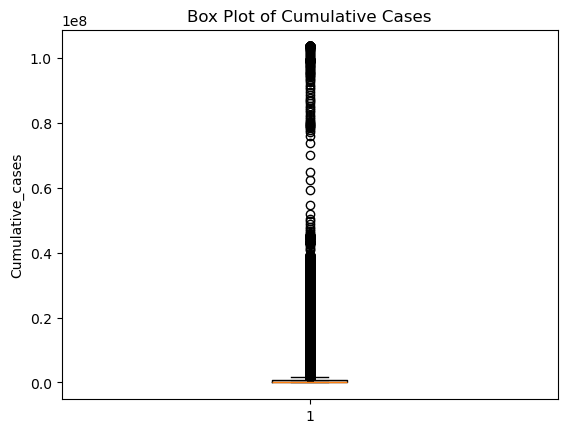

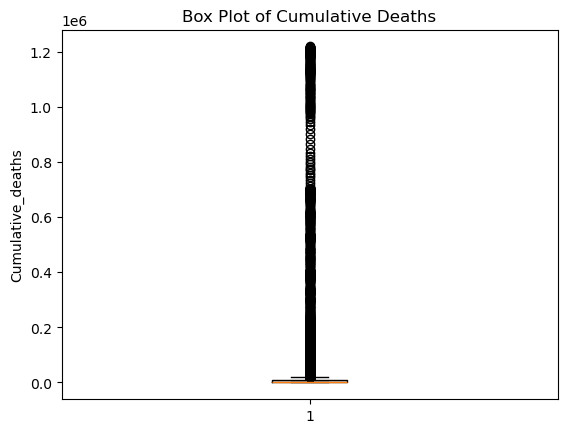

In [19]:
# This boxplot will help us to visualize if there is any outlier present in the dataset
# Importing matplotbib library
import matplotlib.pyplot as plt

plt.boxplot(df['Cumulative_cases'])
plt.title('Box Plot of Cumulative Cases')
plt.ylabel('Cumulative_cases')
plt.show()

plt.boxplot(df['Cumulative_deaths'])
plt.title('Box Plot of Cumulative Deaths')
plt.ylabel('Cumulative_deaths')
plt.show()


In [13]:
# It will help to remove the outlier  if present in the columns.
import pandas as pd
import numpy as np
from scipy import stats

# We are taking the column'cumulative cases' and calculating zscores values of that column
z_scores = stats.zscore(df['Cumulative_cases'])
# Defining threshold as 3
threshold = 3
# It will include only the zscores values that are less than threshold and greater than negative threshold.
df_no_outliers_cc = df[(z_scores < threshold) & (z_scores > -threshold)]
# It will print dataset with no outlier for the column mentioned
df_no_outliers_cc

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,209.0,0,6.0,0
1,2020-01-12,AF,Afghanistan,EMRO,209.0,0,6.0,0
2,2020-01-19,AF,Afghanistan,EMRO,209.0,0,6.0,0
3,2020-01-26,AF,Afghanistan,EMRO,209.0,0,6.0,0
4,2020-02-02,AF,Afghanistan,EMRO,209.0,0,6.0,0
...,...,...,...,...,...,...,...,...
65035,2025-02-09,ZW,Zimbabwe,AFRO,2.0,266410,6.0,5740
65036,2025-02-16,ZW,Zimbabwe,AFRO,209.0,266410,6.0,5740
65037,2025-02-23,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740
65038,2025-03-02,ZW,Zimbabwe,AFRO,0.0,266410,6.0,5740


<h3> Step 5: It will save the cleaned dataset into csv file</h3>

In [16]:
df_no_outliers_cc.to_csv('cleaned_WHO_data.csv', index=False)
print("Data saved in csv format")

Data saved in csv format
